# Fake News Detection  
This project aims to classify news articles as *Fake* or *Real* using Natural Language Processing (NLP) and Machine Learning techniques.  
Fake news is a growing issue in the digital world, and this project provides an approach to detect such misinformation.


## Importing Required Libraries  
We import essential libraries for data processing, visualization, NLP, and model training.  
- **pandas, numpy** – Data handling  
- **nltk** – Natural Language Processing  
- **matplotlib, seaborn** – Visualization  
- **sklearn** – Machine Learning models & evaluation metrics  
- **shap** – Model explainability  


In [36]:
# Data Handling
import pandas as pd
import numpy as np
import string

# NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import learning_curve

# Explainability
import shap
import joblib


## Loading the Dataset  
We use a dataset containing labeled news articles.  
- The dataset has two classes: *Fake* and *Real*  
- It contains textual data that requires preprocessing before feeding it into a model.


In [37]:
df = pd.read_csv("Fake_or_Real.csv")

## Checking for Null Values and Data Cleaning  
Before proceeding with text processing, we check for any missing values in the dataset.  
Missing values can impact model performance, so we handle them appropriately by removing rows with null values.

In [42]:
# Checking for null values
df.isnull().sum()
df = df.dropna()

In [15]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Splitting the Dataset  
We split the dataset into **training** and **testing** sets to evaluate model performance.  
- **80% Training Data**: Used to train the machine learning model  
- **20% Testing Data**: Used to evaluate model accuracy  

In [43]:
X, y = df['text'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Text Vectorization using TF-IDF  
Since machine learning models require numerical input, we convert text data into numerical features using **TF-IDF (Term Frequency-Inverse Document Frequency)**.  

### Why TF-IDF?  
- **Removes common words ("stopwords")** to reduce noise  
- **Assigns weight to words** based on importance in the document  
- **Helps models understand text-based data**  

In [44]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

## Training the Model with Linear SVC  
We use **Linear Support Vector Classification (LinearSVC)**, a powerful algorithm for text classification tasks.  

### Why LinearSVC?  
✔ Works well with high-dimensional text data  
✔ Efficient for large datasets  
✔ Handles binary classification effectively  

The model is trained on the **TF-IDF transformed text data** and evaluated using accuracy.

In [45]:
exe = LinearSVC()
exe.fit(X_train_vectorizer, y_train)

accuracy = exe.score(X_test_vectorizer, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


## Making Predictions on a Sample News Article  
After training the model, we can test it by predicting whether a given news article is **Fake** or **Real**.  

- We **select a test sample** from `X_test`  
- The sample is **vectorized** using the same TF-IDF transformer  
- The trained model **predicts** the label  
- We compare the prediction with the **actual label** from `y_test`  


In [46]:
text = X_test.iloc[10]
vectorized_text = vectorizer.transform([text])
exe.predict(vectorized_text)
y_test.iloc[10]


0

## Sample Test for Fake News Detection Model

This section demonstrates how to test the fake news detection model on a sample text from the test dataset.


In [47]:
# sample test
text = X_test.iloc[10]
print("Sample Text:", text)

# Transform text for prediction
vectorized_text = vectorizer.transform([text])

# Predict whether the text is Fake or Real
prediction = exe.predict(vectorized_text)
print("Predicted Label:", prediction[0])

# Check the actual label
actual_label = y_test.iloc[10]
print("Actual Label:", actual_label)


Sample Text: WASHINGTON  —   In what appears to be the largest leak of C. I. A documents in history, WikiLeaks released on Tuesday thousands of pages describing sophisticated software tools and techniques used by the agency to break into smartphones, computers and even   televisions. The documents amount to a detailed, highly technical catalog of tools. They include instructions for compromising a wide range of common computer tools for use in spying: the online calling service Skype   networks documents in PDF format and even commercial antivirus programs of the kind used by millions of people to protect their computers. A program called Wrecking Crew explains how to crash a targeted computer, and another tells how to steal passwords using the autocomplete function on Internet Explorer. Other programs were called CrunchyLimeSkies, ElderPiggy, AngerQuake and McNugget. The document dump was the latest coup for the antisecrecy organization and a serious blow to the C. I. A. which uses it

## Generate and Display Confusion Matrix

In this section, we generate and display a confusion matrix to evaluate the performance of the fake news detection model.

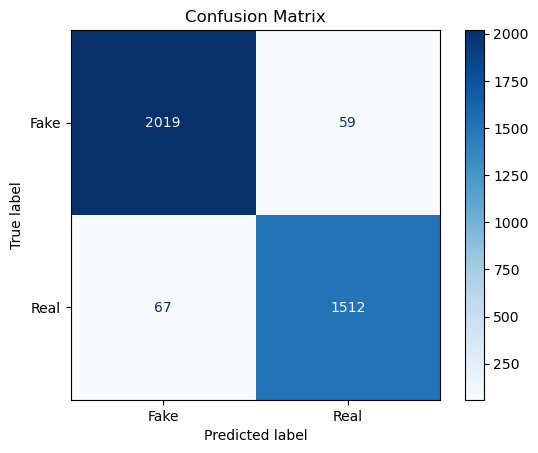

In [23]:
# Generate confusion matrix
y_pred = exe.predict(X_test_vectorizer)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Generate and Display Classification Report

This section generates a classification report to evaluate the performance of the fake news detection model, including precision, recall, f1-score, and support for each class.


In [25]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        Fake       0.97      0.97      0.97      2078
        Real       0.96      0.96      0.96      1579

    accuracy                           0.97      3657
   macro avg       0.97      0.96      0.96      3657
weighted avg       0.97      0.97      0.97      3657



## Model Evaluation and Performance Metrics  
We evaluate the model using:  
📊 **Confusion Matrix** – Shows correct & incorrect classifications  
📉 **ROC Curve & AUC Score** – Measures model performance  
📃 **Classification Report** – Displays Precision, Recall, and F1-score


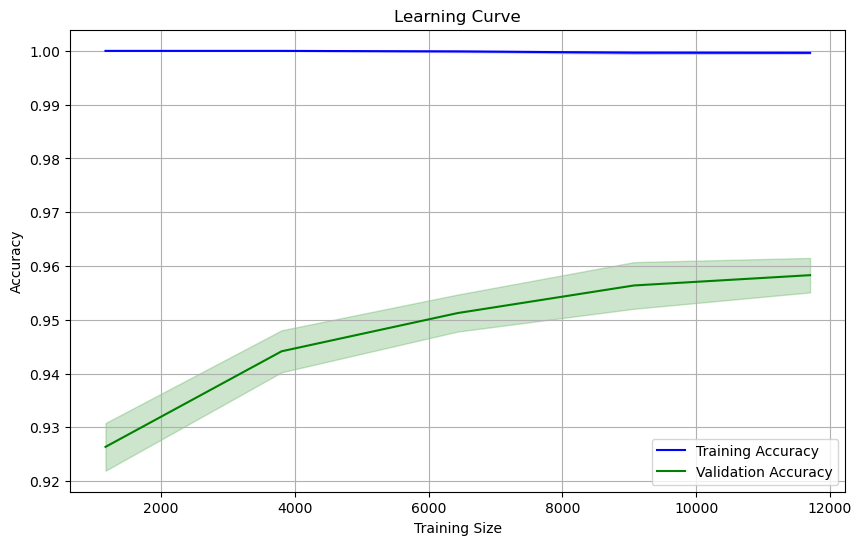

In [27]:
# Get the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    exe, X_train_vectorizer, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')

# Fill the area between the curves to show the variance
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Save the Trained Model and TF-IDF Vectorizer

After training the model and the vectorizer, it is important to save them so that they can be reused without retraining.


In [48]:
# Save the trained model
joblib.dump(exe, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and Vectorizer saved successfully.")


Model and Vectorizer saved successfully.


## Load the Saved Model and Vectorizer for Prediction

Once the model and vectorizer have been saved, we can load them back into memory and use them to make predictions on new, unseen data.


In [33]:
# Load the saved model and vectorizer
loaded_model = joblib.load('fake_news_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict on a new news article
new_text = ["Breaking News: Scientists discover a cure for cancer!"]
vectorized_new_text = loaded_vectorizer.transform(new_text)
prediction = loaded_model.predict(vectorized_new_text)

print("Prediction for the new article:", prediction[0])


Prediction for the new article: 1
